#### USA Houseprices - Dataset 1 - Corrected - Excercise 1 - Timothy Gregorian

In this analysis, we explore a dataset of housing prices in the United States to understand the key factors that influence property values. The main goal is to build a predictive model using a deep learning neural network, which can accurately estimate house prices based on their characteristics.

In addition, we will analyze the correlations between the variables, since there is a possibility that the dataset may not be suitable for achieving a high R-squared score when evaluating the quality of the model.

#### Note
Throughout the project, I followed the lecturer’s GitHub code structure and methodology as closely as possible, and only used AI and external sources when no examples were available in the provided GitHub scripts.

#### Link to Dataset 1
https://www.kaggle.com/datasets/arnavgupta1205/usa-housing-dataset

#### Information about the Dataset
This USA Housing Market Dataset contains 300 rows and 10 columns of real-estate related data, which can be used for housing price predictions.

#### Data Description
The dataset consists of 10 variables related  to housing characteristics in the United States:

1) Price: The selling price of the house (target variable).

2) Bedrooms: Number of bedrooms in the house.

3) Bathrooms: Number of bathrooms in the house.

4) SquareFeet: Total living area in square feet.

5) YearBuilt: The year the property was constructed.

6) GarageSpaces: Number of garage spaces available.

7) LotSize: Size of the property lot.

8) ZipCode: Postal code indicating the geographical location of the    house (categorical variable).

9) CrimeRate: Crime index of the neighborhood where the house is located (0.0 - 100.0).

10) SchoolRating: Quality rating of nearby schools, ranging from 1 (lowest) to 10 (highest).

#### Imports / Modules

In [85]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn import metrics

import tensorflow as tf
import keras
from keras import layers

#### Loading the dataset

In [86]:
df = pd.read_csv("usa_housing_kaggle.csv")
df.head()

,Price,Bedrooms,Bathrooms,SquareFeet,YearBuilt,GarageSpaces,LotSize,ZipCode,CrimeRate,SchoolRating
0,221958,1,1.90,4827,1979,2,1.45,82240,48.60,5
1,771155,2,2.00,1035,1987,2,1.75,74315,92.03,9
2,231932,1,3.00,2769,1982,1,1.46,79249,52.08,3
3,465838,3,3.30,2708,1907,3,1.62,80587,61.65,1
4,359178,4,3.40,1175,1994,2,0.74,20756,15.66,4


Here we check the length of the dataset:

In [87]:
len(df)

300

#### Handle missing values

According to the table below, we do not have any missing values:

In [88]:
df.isna().sum()

Price           0
Bedrooms        0
Bathrooms       0
SquareFeet      0
YearBuilt       0
GarageSpaces    0
LotSize         0
ZipCode         0
CrimeRate       0
SchoolRating    0
dtype: int64

We also do not have any duplicates:

In [89]:
int(df.duplicated().sum())

0

#### Artifical Intelligence and Code source used for this code cell

In this code cell, Artificial Intelligence was used to transform the variable "ZipCode" using the Agglomerative Clustering method, because I could not find any reference or example of agglomerative clustering in the lecturer’s provided GitHub materials.

For this dataset the higher the n_clusters-value (100), the higher the correlation was between the variable "ZipCodeClusterValue" and the target variable "Price" and therefore the better the R²-score.

Source used from the following link: https://scikit-learn.org/stable/modules/generated/sklearn.cluster.AgglomerativeClustering.html

In [90]:
from sklearn.cluster import AgglomerativeClustering

df["ZipCode"] = pd.to_numeric(df["ZipCode"], errors="coerce")

X_zip = df[["ZipCode"]].values

agg_cluster = AgglomerativeClustering(n_clusters=100, linkage='ward')
df["ZipCodeCluster"] = agg_cluster.fit_predict(X_zip)

cluster_mean = df.groupby("ZipCodeCluster")["Price"].mean()

df["ZipCodeClusterValue"] = df["ZipCodeCluster"].map(cluster_mean)

df = df.drop(columns=["ZipCode", "ZipCodeCluster"])

In [91]:
df.head()

,Price,Bedrooms,Bathrooms,SquareFeet,YearBuilt,GarageSpaces,LotSize,CrimeRate,SchoolRating,ZipCodeClusterValue
0,221958,1,1.90,4827,1979,2,1.45,48.60,5,586115.00
1,771155,2,2.00,1035,1987,2,1.75,92.03,9,658365.75
2,231932,1,3.00,2769,1982,1,1.46,52.08,3,533824.00
3,465838,3,3.30,2708,1907,3,1.62,61.65,1,543970.67
4,359178,4,3.40,1175,1994,2,0.74,15.66,4,482602.14


#### X/y-Split

Here we perform a X/y- Split and we drop the target variable "Price".

In [92]:
X = df.drop("Price", axis=1)

y = df["Price"]

<Axes: >

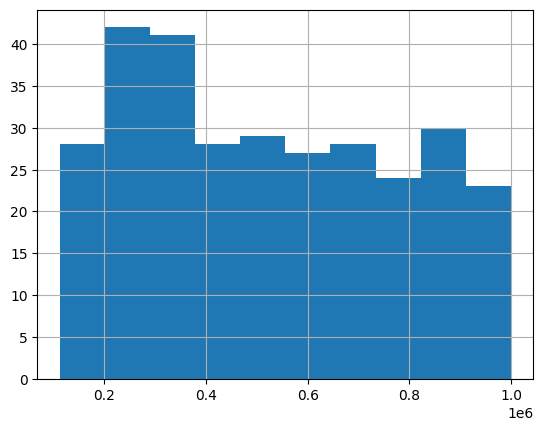

In [93]:
df['Price'].hist()

The histogram above shows the distribution of house prices in the USA. In general the house prices are evenly distributed, but the highest bars are in the lower to moddle price ranges.

#### Inspect the variables - Correlation

According to the correlation table, none of the support variables correlate with the target variable price, except for the variable "ZipCodeClusterValue".

In [94]:
correlations = df.corr(numeric_only=True)
correlations

,Price,Bedrooms,Bathrooms,SquareFeet,YearBuilt,GarageSpaces,LotSize,CrimeRate,SchoolRating,ZipCodeClusterValue
Price,1.00,0.02,0.04,0.04,0.01,0.01,-0.02,0.01,0.02,0.61
Bedrooms,0.02,1.00,-0.04,-0.06,-0.03,-0.04,-0.05,0.01,0.01,-0.03
Bathrooms,0.04,-0.04,1.00,0.01,-0.07,-0.01,-0.10,0.01,0.06,0.00
SquareFeet,0.04,-0.06,0.01,1.00,-0.00,0.05,0.01,-0.04,0.00,0.15
YearBuilt,0.01,-0.03,-0.07,-0.00,1.00,0.09,-0.10,-0.02,0.00,-0.01
GarageSpaces,0.01,-0.04,-0.01,0.05,0.09,1.00,0.11,-0.01,0.03,0.01
LotSize,-0.02,-0.05,-0.10,0.01,-0.10,0.11,1.00,0.03,-0.04,0.01
CrimeRate,0.01,0.01,0.01,-0.04,-0.02,-0.01,0.03,1.00,-0.02,0.08
SchoolRating,0.02,0.01,0.06,0.00,0.00,0.03,-0.04,-0.02,1.00,0.01
ZipCodeClusterValue,0.61,-0.03,0.00,0.15,-0.01,0.01,0.01,0.08,0.01,1.00


#### Fisher's score

The Fisher Score Test shows that the variables ZipCodeClusterValue, LotSize, GarageSpaces, SchoolRating and CrimeRate have the strongest influence in this dataset.

d:\5. Semester\Deep Learning\DL-projects\venv312\Lib\site-packages\skfeature\function\similarity_based\fisher_score.py:59: RuntimeWarning: divide by zero encountered in divide
  score = 1.0 / lap_score - 1


<Axes: >

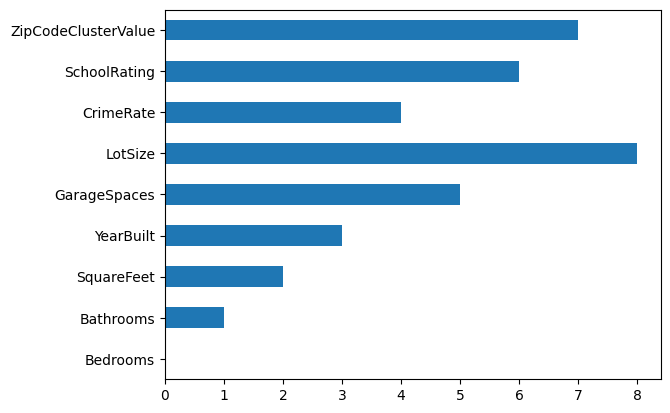

In [95]:
from skfeature.function.similarity_based import fisher_score

ranks = fisher_score.fisher_score(X.values, y.values)
feat_importances = pd.Series(ranks, X.columns)
feat_importances.plot(kind='barh')

#### SelectKBest-Score

The Chi²-Test shows that the variables ZipCodeClusterValue, SquareFeet and CrimeRate have the highest score and therefore are imporant when predicting house prices.

In [96]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

X_cat = X.astype(int)
X_cat = X_cat.clip(lower=0)

chi_2_features = SelectKBest(chi2, k=len(X_cat.columns))
best_features = chi_2_features.fit(X_cat,y.astype(int))

pd.options.display.float_format = '{:.2f}'.format

df_features = pd.DataFrame(best_features.scores_)
df_columns = pd.DataFrame(X_cat.columns)
f_scores = pd.concat([df_columns,df_features],axis=1)
f_scores.columns = ['Features','Score']
f_scores.sort_values(by='Score',ascending=False)

,Features,Score
8,ZipCodeClusterValue,14227016.93
2,SquareFeet,139860.48
6,CrimeRate,5086.90
7,SchoolRating,419.53
4,GarageSpaces,246.44
0,Bedrooms,212.25
3,YearBuilt,197.50
5,LotSize,139.66
1,Bathrooms,109.25


#### VIF-Test

The VIF test shows that most features have acceptable multicollinearity levels, while YearBuilt and ZipCodeClusterValue display higher VIF values, indicating that these two variables are more correlated with other features in the dataset.

In [97]:
from statsmodels.stats.outliers_influence import variance_inflation_factor 

vif_data = pd.DataFrame() 
vif_data["feature"] = X.columns 

vif_data["VIF"] = [variance_inflation_factor(X.values, i) 
                          for i in range(len(X.columns))] 

print(vif_data)

               feature   VIF
0             Bedrooms  5.22
1            Bathrooms  8.79
2           SquareFeet  7.77
3            YearBuilt 40.12
4         GarageSpaces  2.90
5              LotSize  4.90
6            CrimeRate  3.97
7         SchoolRating  4.67
8  ZipCodeClusterValue 12.35


#### Train/test/validation -split (70/30)

In [98]:
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.3)

X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5)

#### Create the neural network structure

Here next to the Normalization we also tried to add Regularsation, to see if the model will perform better, when being trained. The code was used from the professor's Github.

In [99]:
from keras.callbacks import ModelCheckpoint, EarlyStopping, ReduceLROnPlateau

variable_amount = len(X.columns)

mc = ModelCheckpoint('best_model_small_dataset.keras', monitor='val_loss', mode='min', save_best_only=True)

callback_list = [mc]

model4 = keras.Sequential(
    [
        layers.BatchNormalization(input_shape=(variable_amount,)),
        layers.Dense(24, activation="relu", kernel_regularizer=keras.regularizers.l1_l2(l1=0.1, l2=0.1)),
        layers.Dropout(0.2),
        layers.Dense(12, activation="relu"),
        layers.Dense(8, activation="relu"),
        layers.Dense(1)
    ]
)

model4.compile(optimizer='adam', loss='mse')
model4.summary()

d:\5. Semester\Deep Learning\DL-projects\venv312\Lib\site-packages\keras\src\layers\normalization\batch_normalization.py:142: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ batch_normalization_2           │ (None, 9)              │            36 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_8 (Dense)                 │ (None, 24)             │           240 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 24)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_9 (Dense)                 │ (None, 12)             │           300 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_10 (Dense)                │ (None, 8)              │           104 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_11 (Dense)                │ (None, 1)              │             9 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 689 (2.69 KB)

 Trainable params: 671 (2.62 KB)

 Non-trainable params: 18 (72.00 B)

#### Training of the Model

In [100]:
model4.fit(x=X_train, y=y_train, epochs=700, validation_data=(X_val, y_val), callbacks=callback_list)

Epoch 1/700
7/7 ━━━━━━━━━━━━━━━━━━━━ 2s 36ms/step - loss: 336521756672.0000 - val_loss: 393406742528.0000
Epoch 2/700
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 336521658368.0000 - val_loss: 393410445312.0000
Epoch 3/700
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 336521527296.0000 - val_loss: 393411362816.0000
Epoch 4/700
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 336521297920.0000 - val_loss: 393411231744.0000
Epoch 5/700
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 336521166848.0000 - val_loss: 393410248704.0000
Epoch 6/700
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 336520904704.0000 - val_loss: 393408741376.0000
Epoch 7/700
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 336520544256.0000 - val_loss: 393406873600.0000
Epoch 8/700
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 336520151040.0000 - val_loss: 393404448768.0000
Epoch 9/700
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 336519626752.0000 - val_loss: 393401303040.0000
Epoch 10/700
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/

#### Performance and Error Metrics

In the graph below we see that both lines loss and val_loss drop significantly in the first 100 epochs and after 150 epochs the line straightens, showing a sign of the model overfitting.

<Axes: >

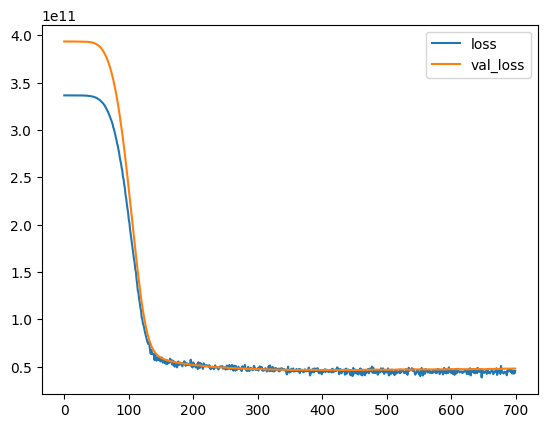

In [101]:
loss_df = pd.DataFrame(model4.history.history)
loss_df.plot()

#### Load the best model version

In [102]:
from keras.models import load_model
model4 = load_model("best_model_small_dataset.keras")

The data evaluation results show that the model performs similarly on both sets, which indicates a balanced fit.

In [103]:
print("Test data evaluation:")
print(model4.evaluate(X_test, y_test, verbose=0))
print("\nTrain data evaluation:")
print(model4.evaluate(X_train, y_train, verbose=0))

Test data evaluation:
38433386496.0

Train data evaluation:
41567703040.0


In [104]:
test_predictions = model4.predict(X_test)

test_predictions = pd.Series(test_predictions.reshape(len(y_test),))
pred_df = pd.DataFrame(np.asarray(y_test), columns=['Test True Y'])
pred_df = pd.concat([pred_df, test_predictions], axis=1)
pred_df.columns = ['Test True Y', 'Model Predictions']

pred_df

1/2 ━━━━━━━━━━━━━━━━━━━━ 0s 84ms/stepWARNING:tensorflow:6 out of the last 8 calls to <function TensorFlowTrainer.make_predict_function.<locals>.one_step_on_data_distributed at 0x00000144E8125C60> triggered tf.function retracing. Tracing is expensive and the excessive number of tracings could be due to (1) creating @tf.function repeatedly in a loop, (2) passing tensors with different shapes, (3) passing Python objects instead of tensors. For (1), please define your @tf.function outside of the loop. For (2), @tf.function has reduce_retracing=True option that can avoid unnecessary retracing. For (3), please refer to https://www.tensorflow.org/guide/function#controlling_retracing and https://www.tensorflow.org/api_docs/python/tf/function for  more details.
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 90ms/step


,Test True Y,Model Predictions
0,170467,475252.94
1,265838,562372.50
2,256730,479984.88
3,429365,597515.38
4,589492,447009.81
5,547600,494954.53
6,613153,598873.62
7,637833,641528.75
8,193264,113574.02
9,867595,689734.25


<Axes: xlabel='Test True Y', ylabel='Model Predictions'>

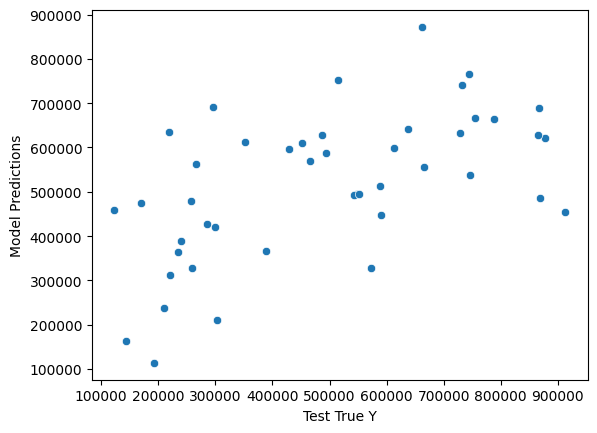

In [105]:
sns.scatterplot(x='Test True Y', y='Model Predictions', data=pred_df)

In [106]:
print("MAE")
print(round(metrics.mean_absolute_error(y_test, test_predictions), 2), "$")

print("\nMSE")
print(round(metrics.mean_squared_error(y_test, test_predictions), 2), "$^2")

print('\nRMSE:')
print(round(np.sqrt(metrics.mean_squared_error(y_test, test_predictions)), 2), "$")

print('\nR-squared:')
print(round(metrics.r2_score(y_test, test_predictions), 2))

print("\nExplained variance score:")
print(round(metrics.explained_variance_score(y_test, test_predictions), 2))

MAE
157728.86 $

MSE
38433386496.0 $^2

RMSE:
196044.35 $

R-squared:
0.29

Explained variance score:
0.3


With an R² of 0.29 and an explained variance score of 0.3, the model explains roughly 30% of the variability in house prices, showing limited but consistent predictive performance.

C:\Users\Timothy\AppData\Local\Temp\ipykernel_6576\3264322254.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot((y_test - test_predictions))


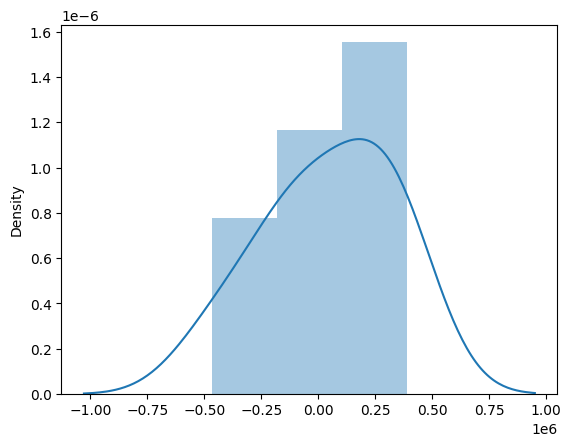

In [107]:
sns.distplot((y_test - test_predictions))
plt.show()
plt.close()

In [108]:
df.columns

Index(['Price', 'Bedrooms', 'Bathrooms', 'SquareFeet', 'YearBuilt',
       'GarageSpaces', 'LotSize', 'CrimeRate', 'SchoolRating',
       'ZipCodeClusterValue'],
      dtype='object')

#### Trying the model in practice with new imaginery house

In [109]:
tester_row = {
    "Bedrooms": 5,
    "Bathrooms": 3.7,
    "SquareFeet": 3530,
    "YearBuilt": 1954,
    "GarageSpaces": 2,
    "LotSize": 0.74,
    "CrimeRate": 2.91,
    "SchoolRating": 6,
    "ZipCodeClusterValue": 382475
}

tester_row = pd.DataFrame([tester_row])


In [110]:
result = model4.predict(tester_row)[0]

print()
print(f"Estimated house price:")
print(f"$ {round(float(result[0]), 2)}")
print("----------------")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step

Estimated house price:
$ 499044.41
----------------


#### Conclusion
At the beginning of this project, the model produced a negative R²-score, indicating poor predictive performance.

After optimizing the ZipCode variable using Agglomerative Clustering, the R²-score improved significantly, showing that regional grouping added meaningful information to the model.

This demonstrates that when features show little to no correlation with the target variable (Price), it is possible to enhance model performance by transforming or optimizing those features.

Throughout the project, I followed the lecturer’s GitHub code structure and methodology as closely as possible, and only used AI and external sources when no examples were available in the provided GitHub scripts.